# The Sparks Foundation-Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as pllt
%matplotlib inline
import seaborn as sns

#Loading dataset

In [2]:
df=pd.read_csv("student_scores.csv")

#Understanding the dataset

In [3]:
df.shape

(25, 2)

In [4]:
df.sample(5)

,Hours,Scores
4,3.5,30
24,7.8,86
13,3.3,42
16,2.5,30
1,5.1,47


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#Exploratory Data Analysis

<AxesSubplot:xlabel='Hours', ylabel='Count'>

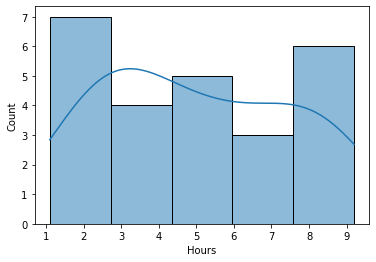

In [10]:
sns.histplot(df["Hours"], bins=5, kde=True)

<AxesSubplot:xlabel='Scores'>

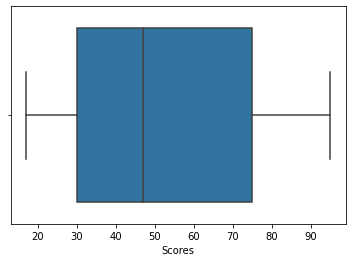

In [12]:
sns.boxplot(x="Scores", data=df)

Text(0, 0.5, 'Scores')

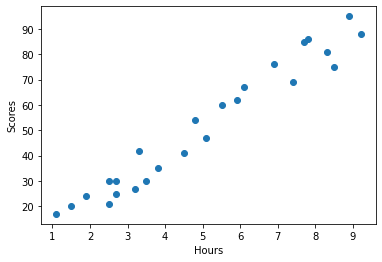

In [13]:
pllt.scatter(df["Hours"], df["Scores"])
pllt.xlabel("Hours")
pllt.ylabel("Scores")

In [14]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

#train_test_split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

#training the model

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [19]:
reg.fit(x_train,y_train)

LinearRegression()

#evaluating the model

In [21]:
y_pred=reg.predict(x_test)

In [22]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [23]:
y_test

8     81
16    30
0     21
23    76
11    62
Name: Scores, dtype: int64

In [24]:
actual_predict=pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

In [25]:
actual_predict

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


#mean absolute error and r2 score

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [58]:
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error", mae)

Mean Absolute Error 3.9207511902099244


In [60]:
r2=r2_score(y_test,y_pred)
print("r2 score", r2)

r2 score 0.9678055545167994


In [47]:
hrs=9.25
score=reg.predict([[hrs]])
print("If a student studies for 9.25 hrs/day, he/she will score", score)

If a student studies for 9.25 hrs/day, he/she will score [92.38611528]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
